In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


# Importing the dataset

In [2]:
df=pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv",encoding='latin-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
df.shape

(953, 24)

In [6]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


<Axes: >

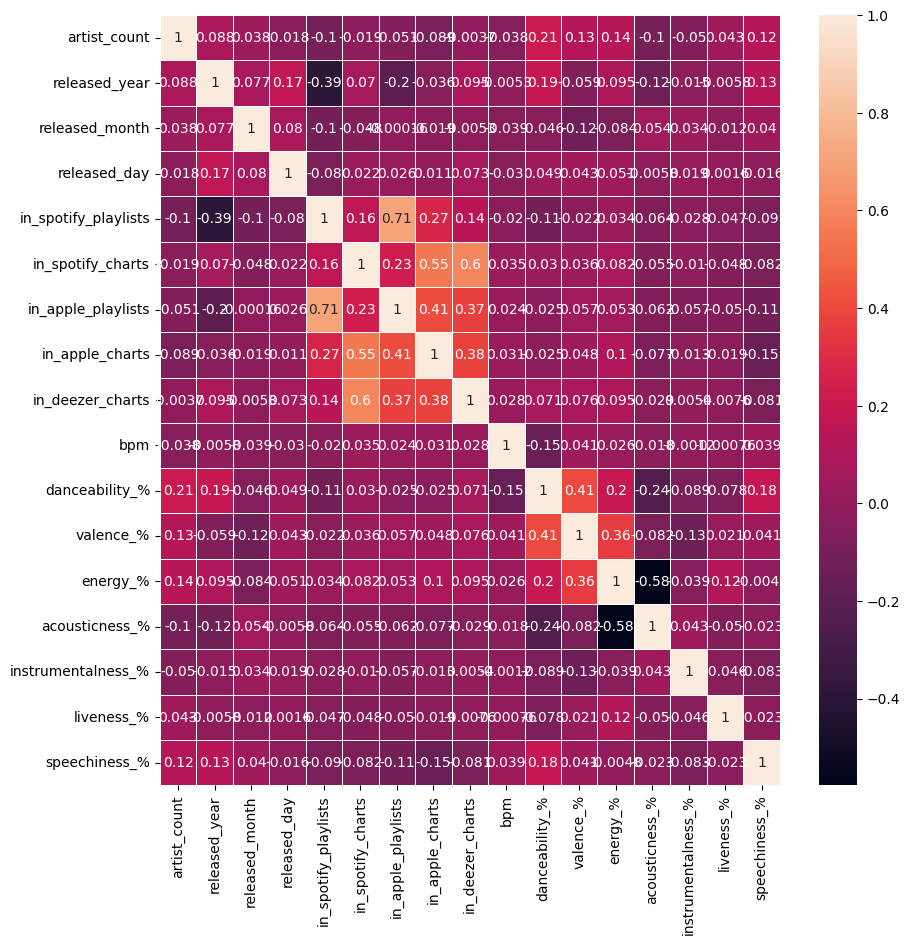

In [7]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

### Converting columns types

In [8]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

### Handling missing values

In [9]:
df['key'] = df['key'].fillna('Unknown')
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

In [10]:
# Fill NaNs with zero or another appropriate value
df.fillna(0, inplace=True)

# Ensure all columns have finite values
df.replace([float('inf'), float('-inf')], 0, inplace=True)


### Dataset for the songs that released in 2023

In [11]:
#filtering data according to year 2023
year_2023=df[df['released_year']==2023]
year_2023.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.0,67,...,141,C#,Major,92,66,58,19,0,8,24


# Question 1: top 5 songs and their artists


In [12]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
top_songs_and_artists= df[['track_name','artist(s)_name','streams']].sort_values(by='streams',ascending=False).head()
top_songs_and_artists
#top songs and artists

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


### Creating Plot

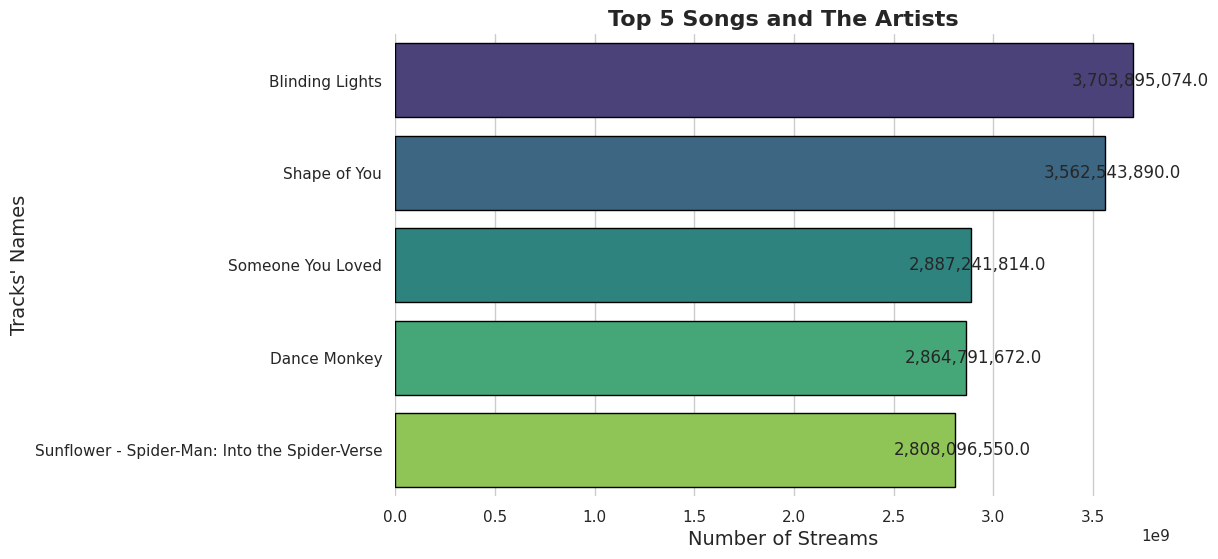

In [14]:
# Set the style
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(
    x='streams', 
    y='track_name', 
    data=top_songs_and_artists, 
    palette="viridis", 
    edgecolor='black'
)

# Add annotations
for bar in bars.patches:
    plt.annotate(
        format(bar.get_width(), ','),
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),
        ha='center', 
        va='center',
        xytext=(5, 0),
        textcoords='offset points'
    )

# Set titles and labels
ax.set_title("Top 5 Songs and The Artists", fontsize=16, weight='bold')
ax.set_xlabel("Number of Streams", fontsize=14)
ax.set_ylabel("Tracks' Names", fontsize=14)

# Remove the top and right spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

### Creating Interractive Plot

In [15]:
import plotly.express as px

# Create the plot
fig = px.bar(
    top_songs_and_artists, 
    x='streams', 
    y='track_name', 
    text='streams', 
    color='streams', 
    color_continuous_scale='viridis', 
    title="Top 5 Songs and The Artists"
)

# Update the layout
fig.update_layout(
    xaxis_title="Number of Streams",
    yaxis_title="Tracks' Names",
    title_font_size=22,
    title_font_family="Arial",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

# Update the traces
fig.update_traces(texttemplate='%{text:,}', textposition='outside')

# Show the plot
fig.show()

# Question 2: Number of songs over year on Spotify

In [16]:
year_song= df.groupby('released_year')['track_name'].count()
year_song

released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: track_name, dtype: int64

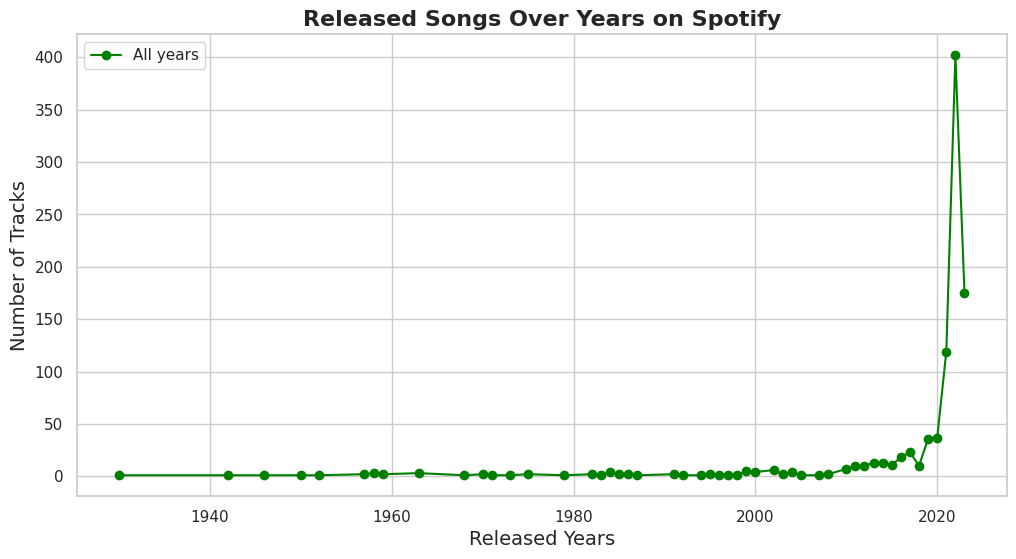

In [17]:
# Set the style
sns.set(style="whitegrid")

# First plot: Number of songs over years
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(year_song.index, year_song.values, marker='o', linestyle='-', color='green', label='All years')

ax1.set_xlabel("Released Years", fontsize=14)
ax1.set_ylabel("Number of Tracks", fontsize=14)
ax1.set_title("Released Songs Over Years on Spotify", fontsize=16, weight='bold')
ax1.legend()
ax1.grid(True)

In [18]:
year1= df[(df['released_year']>=2018) & (df['released_year']<=2023)]
year2=year1.groupby('released_year')['track_name'].count()
year2

released_year
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: track_name, dtype: int64

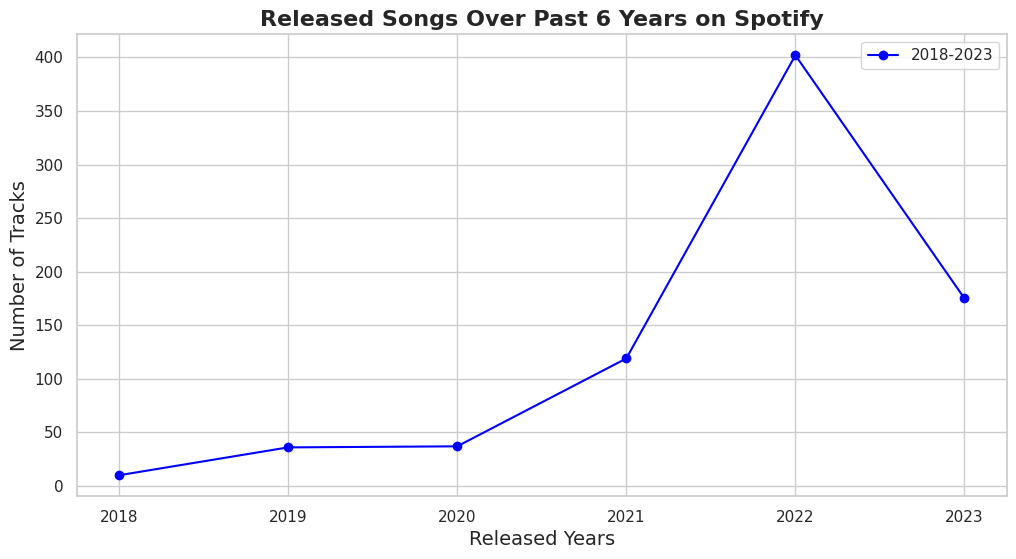

In [19]:
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(year2.index, year2.values, marker='o', linestyle='-', color='blue', label='2018-2023')

ax2.set_xlabel("Released Years", fontsize=14)
ax2.set_ylabel("Number of Tracks", fontsize=14)
ax2.set_title("Released Songs Over Past 6 Years on Spotify", fontsize=16, weight='bold')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.show()

### Interractive plots

In [20]:
import plotly.express as px

# First plot: Number of songs over years
fig1 = px.line(
    year_song.reset_index(), 
    x='released_year', 
    y='track_name', 
    title='Released Songs Over Years on Spotify',
    labels={'released_year': 'Released Years', 'track_name': 'Number of Tracks'}
)
fig1.update_traces(mode='lines+markers', line_color='green')
fig1.update_layout(title_font_size=22, title_font_family="Arial")

# Second plot: Number of songs over past 6 years
fig2 = px.line(
    year2.reset_index(), 
    x='released_year', 
    y='track_name', 
    title='Released Songs Over Past 6 Years on Spotify',
    labels={'released_year': 'Released Years', 'track_name': 'Number of Tracks'}
)
fig2.update_traces(mode='lines+markers', line_color='blue')
fig2.update_layout(title_font_size=22, title_font_family="Arial")

# Show the plots
fig1.show()
fig2.show()


# Question 3: playlists vs. streams

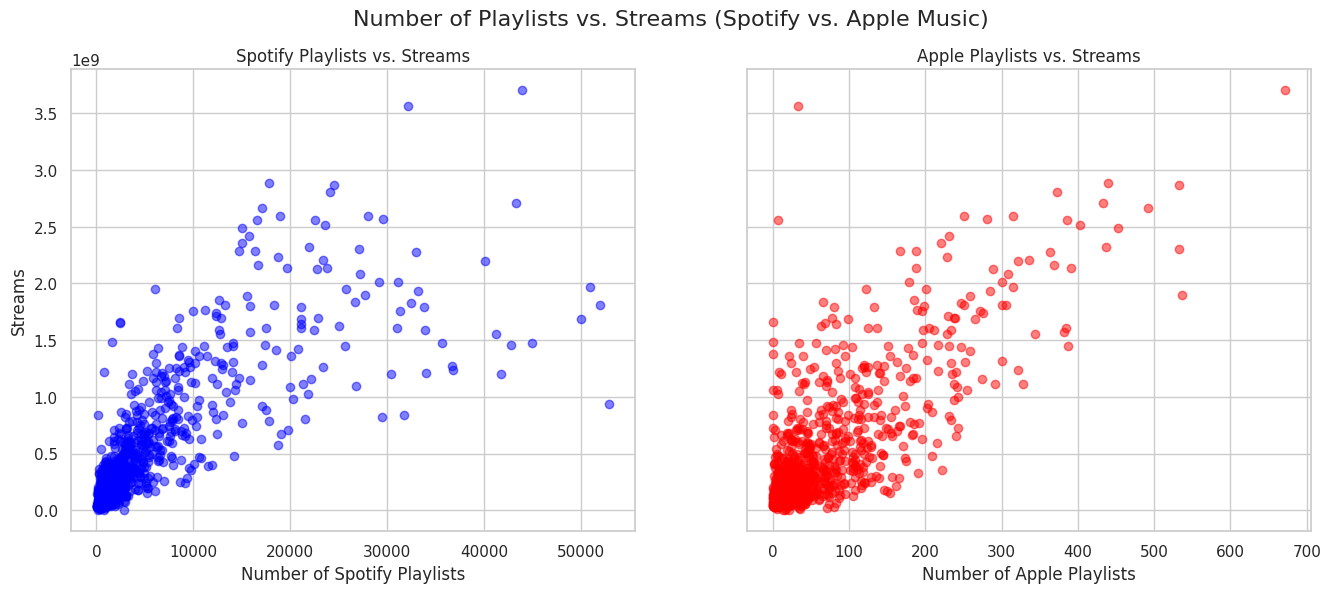

In [21]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Scatter plot for Spotify Playlists vs. Streams
axs[0].scatter(df['in_spotify_playlists'], df['streams'], color='blue', alpha=0.5)
axs[0].set_xlabel('Number of Spotify Playlists')
axs[0].set_ylabel('Streams')
axs[0].set_title('Spotify Playlists vs. Streams')
axs[0].grid(True)

# Scatter plot for Apple Playlists vs. Streams
axs[1].scatter(df['in_apple_playlists'], df['streams'], color='red', alpha=0.5)
axs[1].set_xlabel('Number of Apple Playlists')
axs[1].set_title('Apple Playlists vs. Streams')
axs[1].grid(True)

# Set a common title
fig.suptitle('Number of Playlists vs. Streams (Spotify vs. Apple Music)', fontsize=16)

plt.show()


# Question 4: Anlyzing features

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



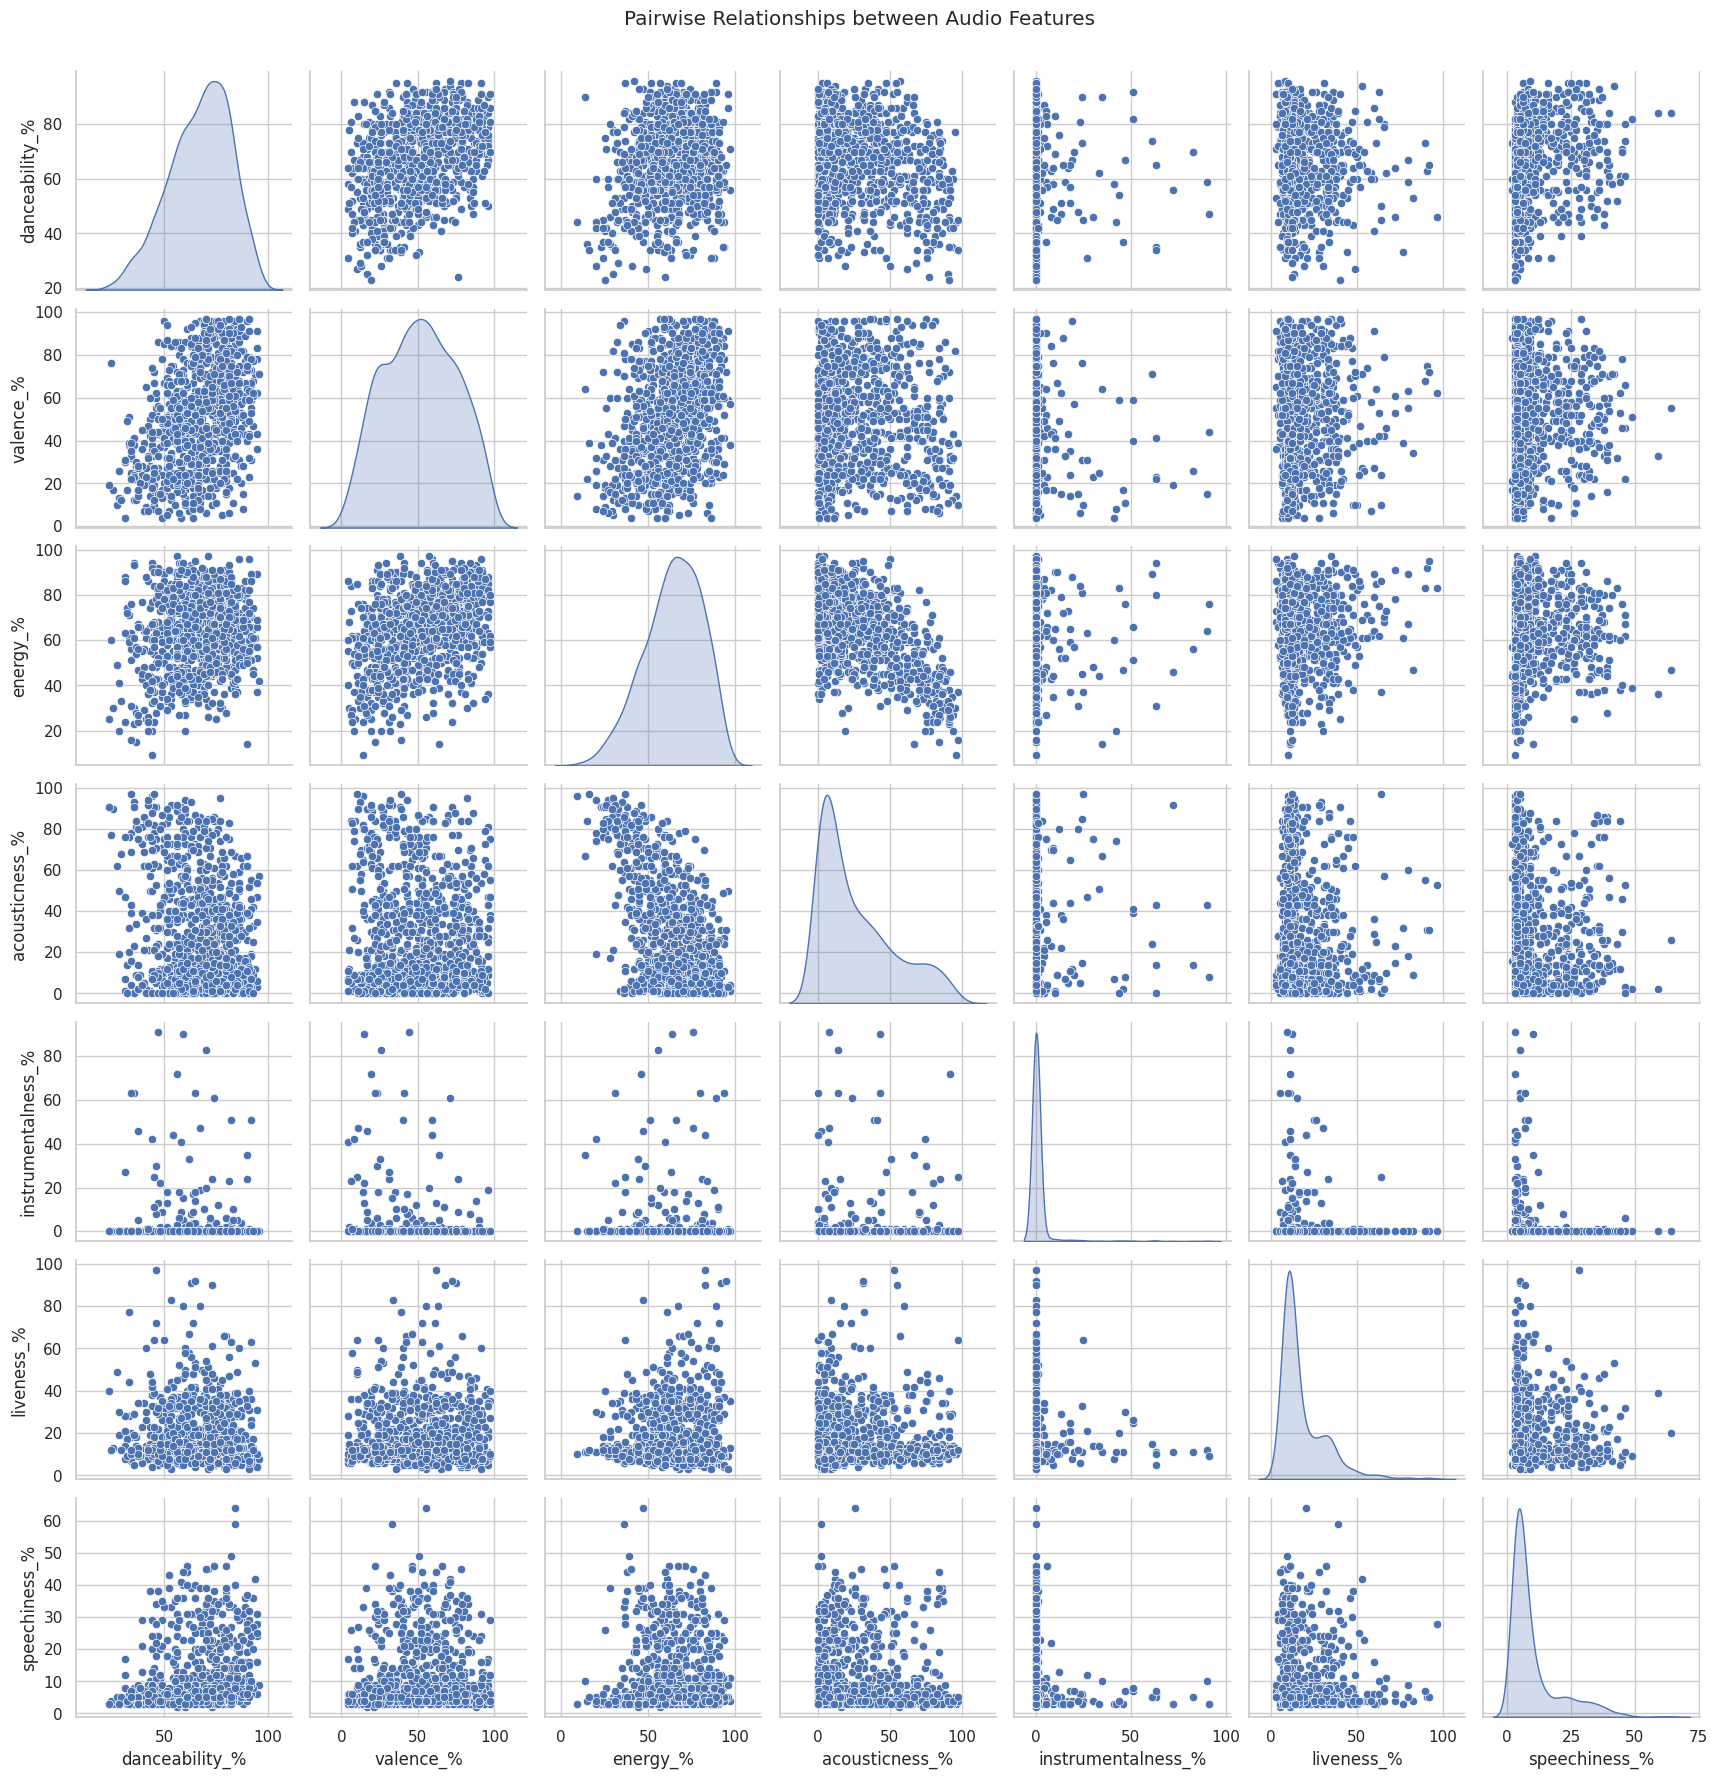

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for analysis
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
sns.pairplot(df[features], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Audio Features', y=1.02)
plt.show()


# Question 5: Creating radar chart for 1st song

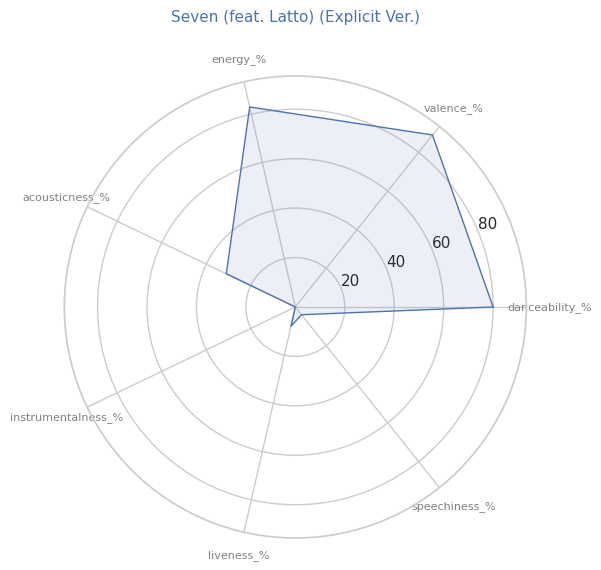

In [23]:
from math import pi
def create_radar_chart(df, row, title):
    categories = list(df[features].columns)
    values = df[features].loc[row].values.flatten().tolist()
    values += values[:1]
    
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.title(title, size=11, color='b', y=1.1)
    

plt.figure(figsize=(6, 6))
create_radar_chart(df, 0, df['track_name'].iloc[0])
plt.show()


## Creating clusters

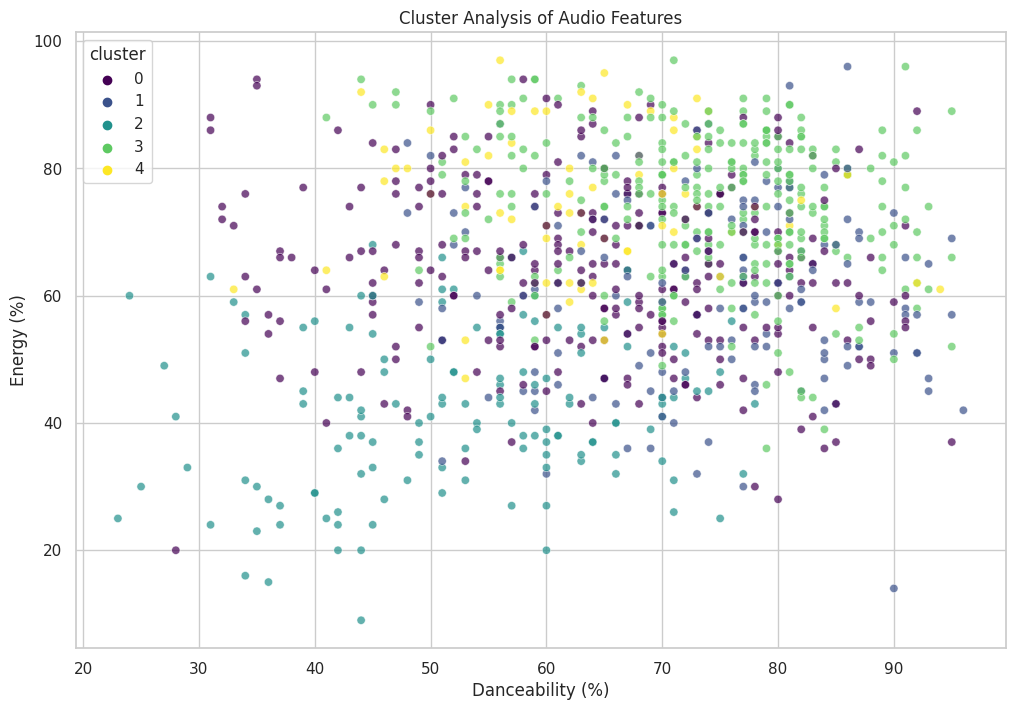

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(df[features])
df['cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='danceability_%', y='energy_%', hue='cluster', palette='viridis', data=df, alpha=0.7)
plt.title('Cluster Analysis of Audio Features')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.show()


# Question 6: Trends of the futures over time

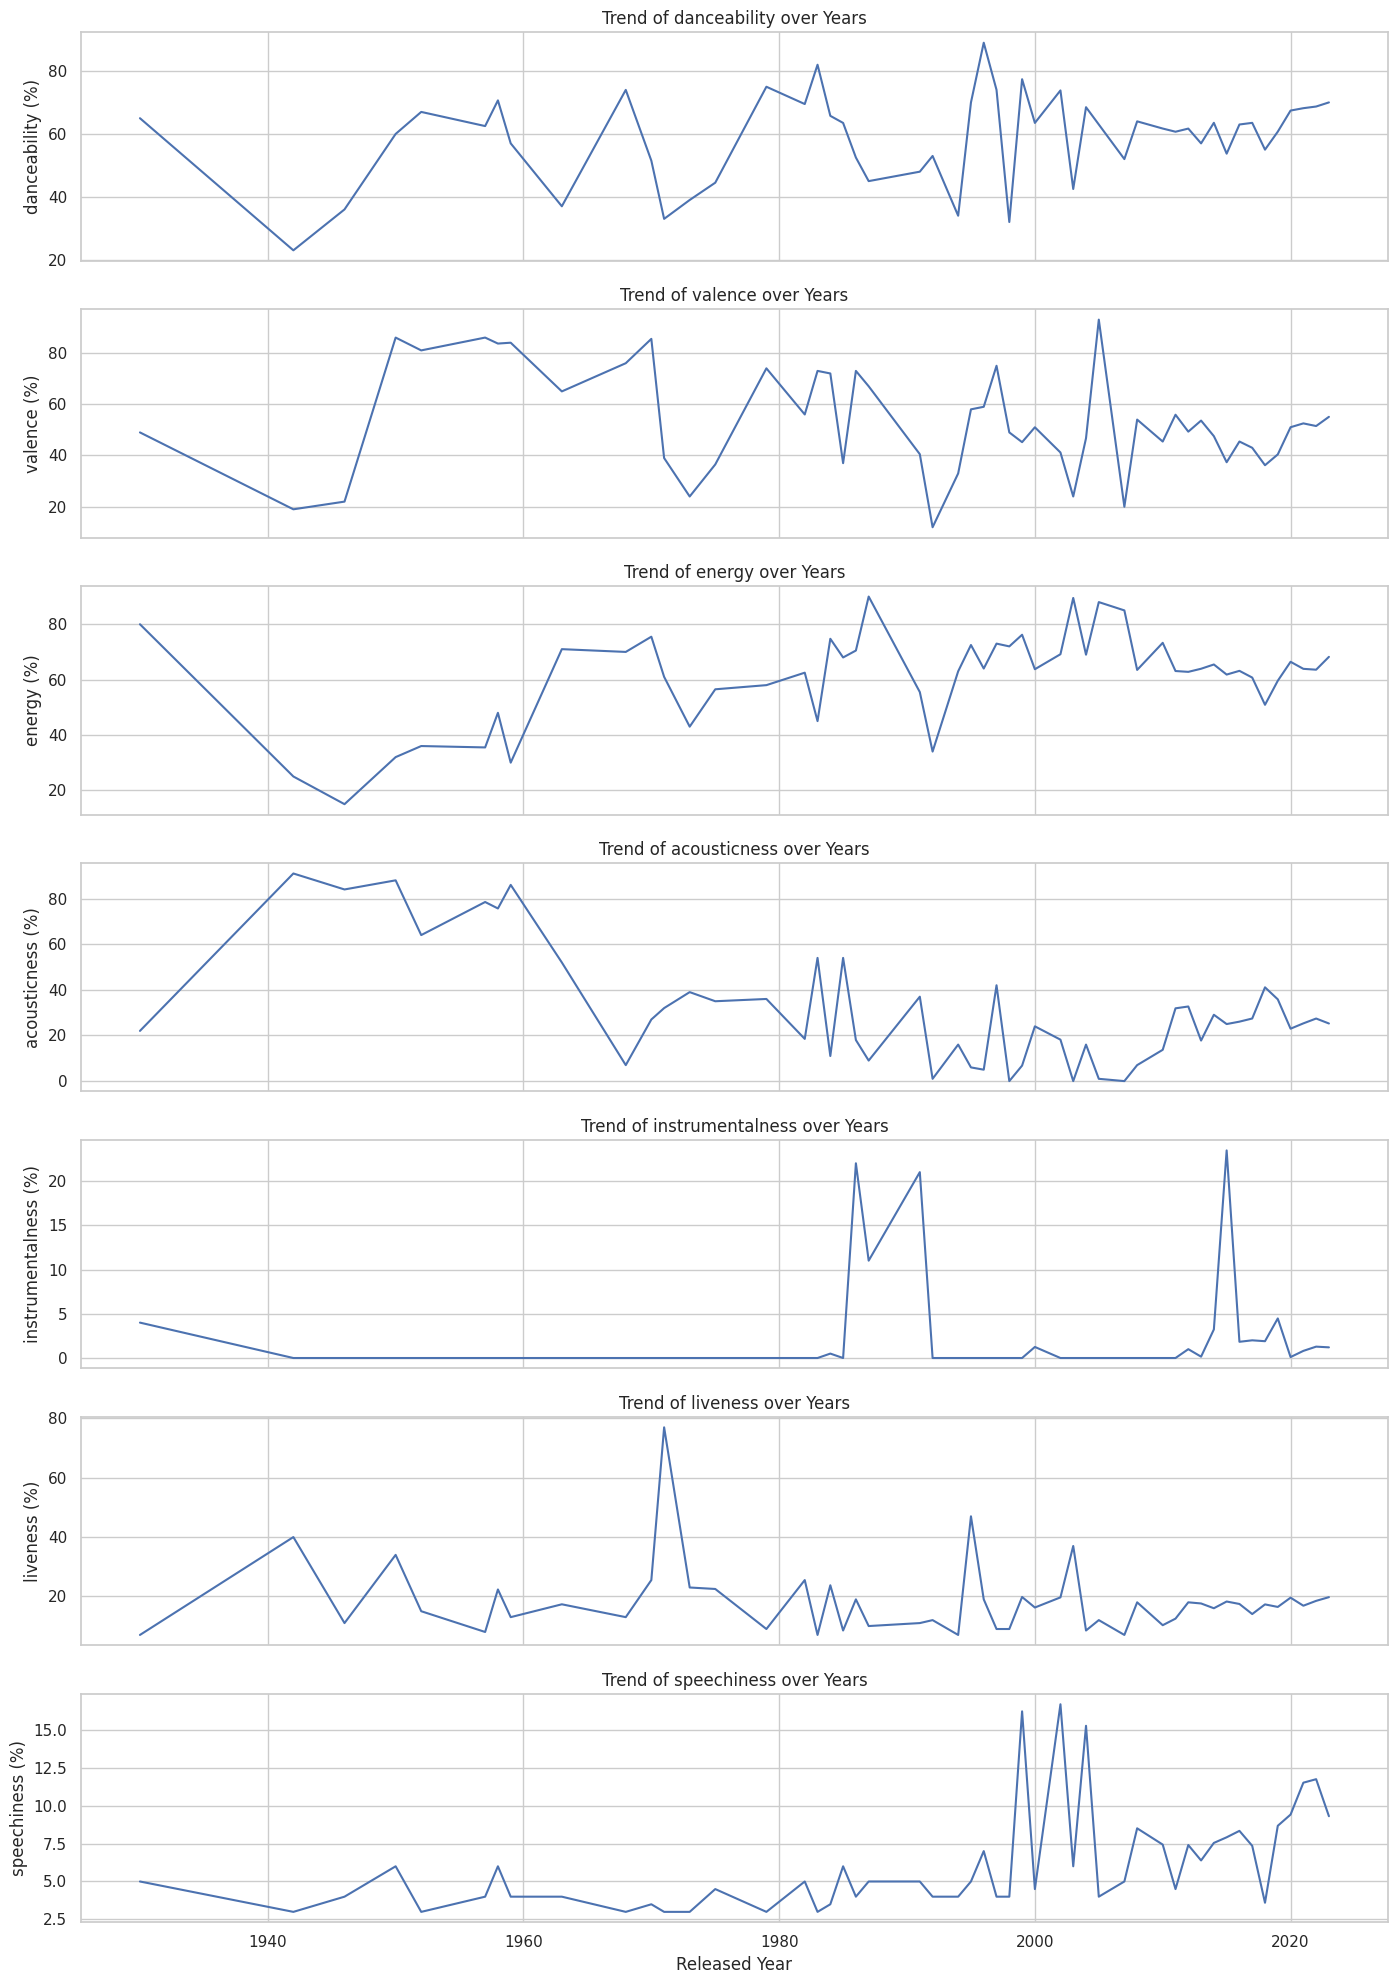

In [25]:
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
trends = df.groupby('released_year')[audio_features].mean().reset_index()

# Plotting trends over time
fig, ax = plt.subplots(len(audio_features), 1, figsize=(14, 20), sharex=True)
for i, feature in enumerate(audio_features):
    sns.lineplot(x='released_year', y=feature, data=trends, ax=ax[i])
    ax[i].set_title(f'Trend of {feature.replace("_%", "")} over Years')
    ax[i].set_ylabel(feature.replace("_%", " (%)"))

plt.xlabel('Released Year')
plt.tight_layout()
plt.show()


# Question 7: Heatmap for frequency of the chart appearance

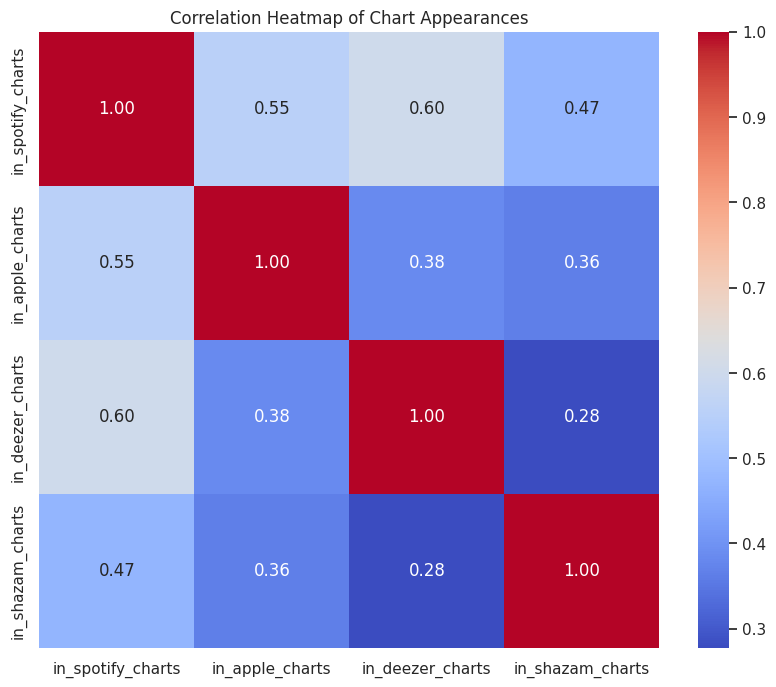

In [26]:
heatmap_data = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Chart Appearances')
plt.show()
